In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lv-college.csv', sep = ';')

# étude de l'influence de l'académie d'origine sur le pourcentage d'élèves étant dans un collège privé

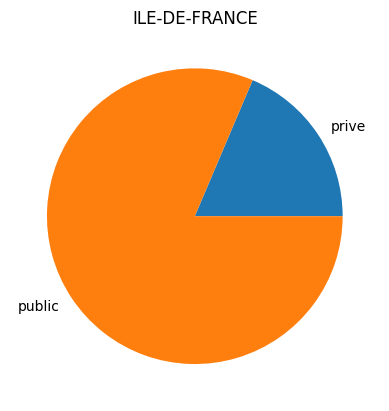

C:\Users\marie\AppData\Local\Temp\ipykernel_8152\501530789.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


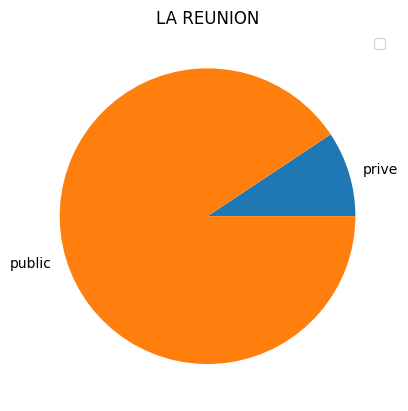

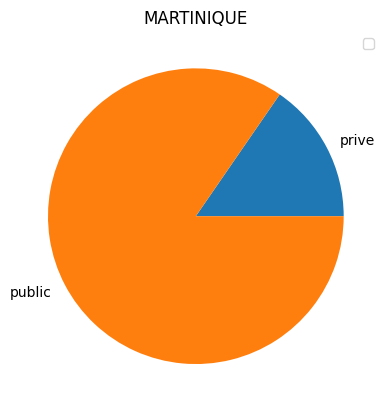

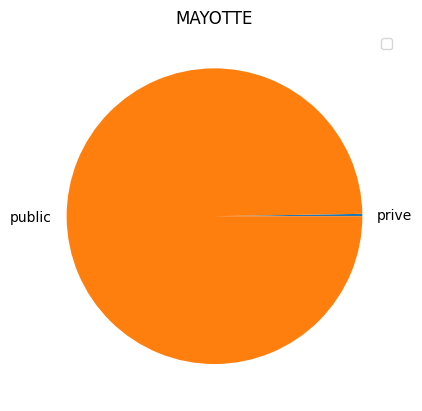

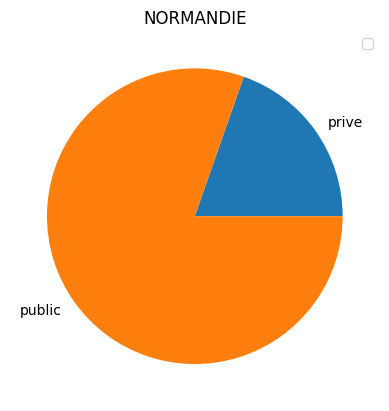

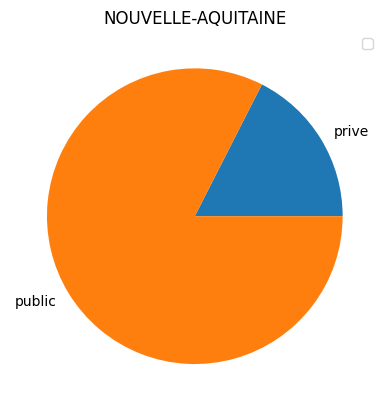

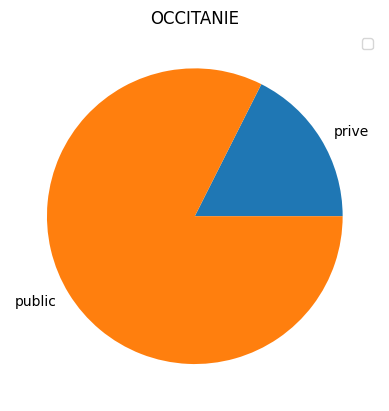

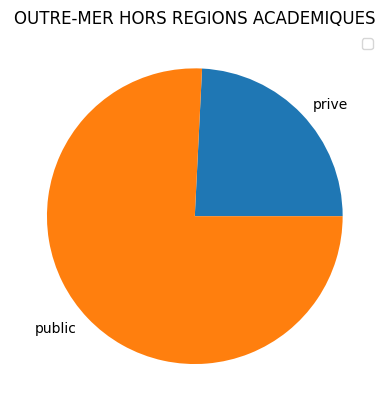

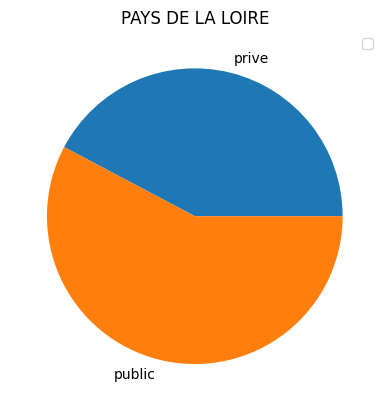

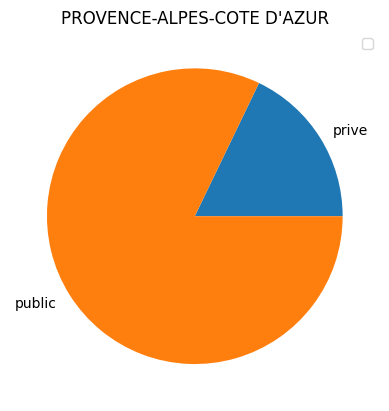

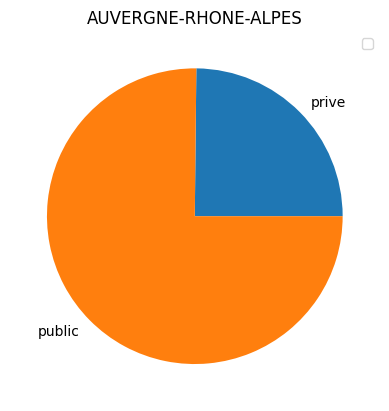

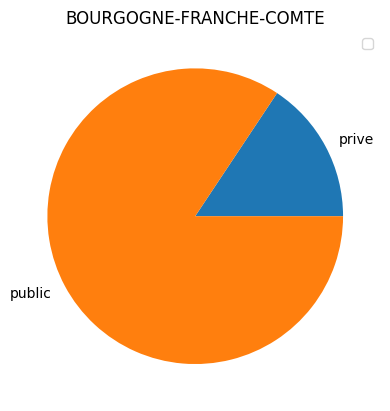

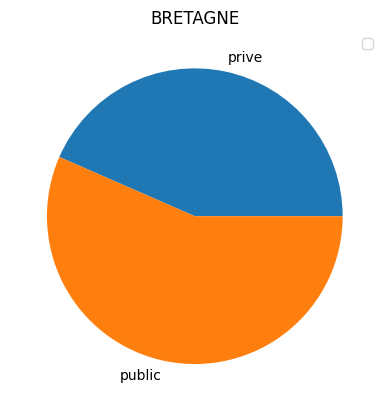

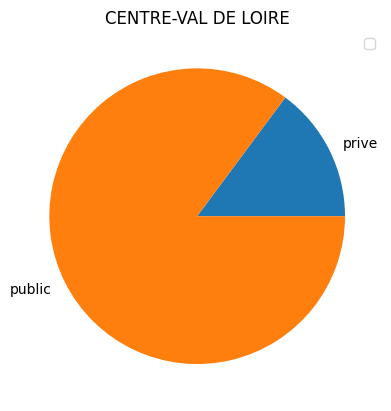

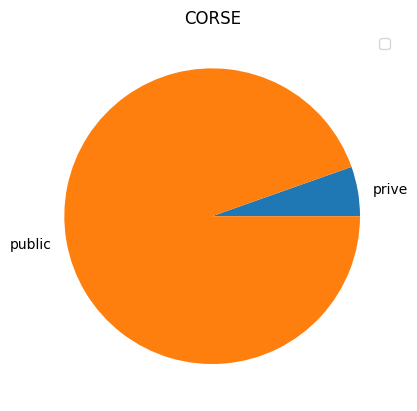

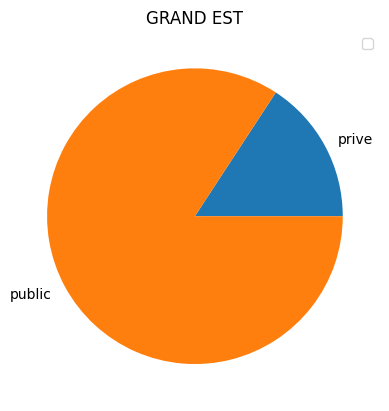

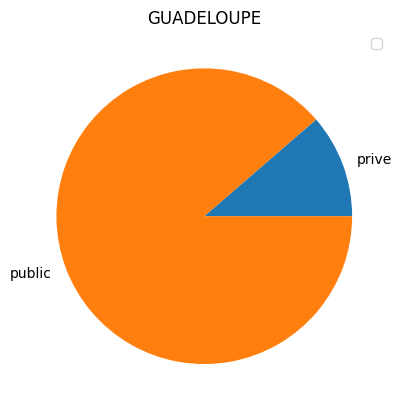

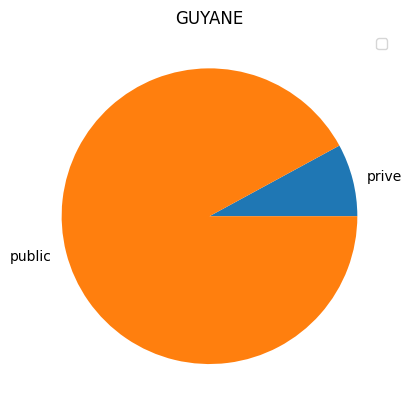

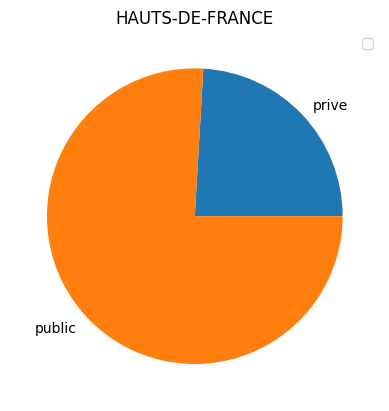

{'ILE-DE-FRANCE': 0.18602996516926643, 'LA REUNION': 0.09336091895152188, 'MARTINIQUE': 0.15398673641357877, 'MAYOTTE': 0.002549407246174225, 'NORMANDIE': 0.1962498011751153, 'NOUVELLE-AQUITAINE': 0.17505774899585702, 'OCCITANIE': 0.17569385623129483, 'OUTRE-MER HORS REGIONS ACADEMIQUES': 0.2421744893450702, 'PAYS DE LA LOIRE': 0.4225379009431368, "PROVENCE-ALPES-COTE D'AZUR": 0.17851462908603247, 'AUVERGNE-RHONE-ALPES': 0.24832798085040406, 'BOURGOGNE-FRANCHE-COMTE': 0.15660783039151957, 'BRETAGNE': 0.4344050296524466, 'CENTRE-VAL DE LOIRE': 0.14832816863388307, 'CORSE': 0.054168832133046255, 'GRAND EST': 0.1578358505940988, 'GUADELOUPE': 0.11349533575152652, 'GUYANE': 0.0792628034142438, 'HAUTS-DE-FRANCE': 0.24078970161124114}
les régions avec le plus gros pourcentage d'élèves scolarisés dans le privé sont [('BRETAGNE', 0.4344050296524466), ('PAYS DE LA LOIRE', 0.4225379009431368), ('AUVERGNE-RHONE-ALPES', 0.24832798085040406)]
les régions avec le moins d'élèves scolarisés dans le pr

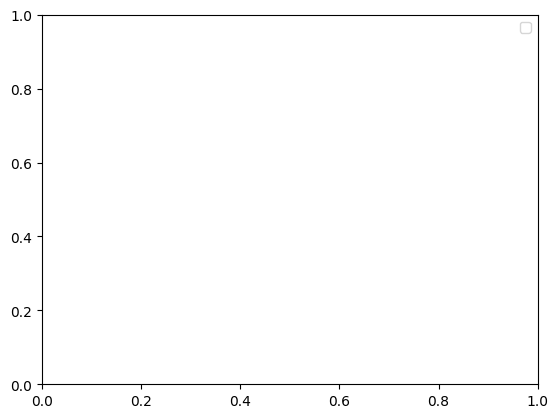

In [3]:
df.columns
gb=df.groupby(by=['Secteur','Région académique'])
dico=gb["Nombre d'élèves total"].sum().to_dict()

region=df["Région académique"].unique()
dico_data={}


for reg in region:
    data=[dico[('PRIVE',f"{reg}")],dico[('PUBLIC',f"{reg}")]]
    perc=dico[('PRIVE',f"{reg}")]/(dico[('PRIVE',f"{reg}")]+dico[('PUBLIC',f"{reg}")])
    dico_data[f"{reg}"]=perc
    plt.pie(data,labels=['prive','public'])
    plt.title(f"{reg}")
    plt.show()
    plt.legend()


print(dico_data)
regions_plus = sorted(dico_data.items(), key=lambda x: x[1], reverse=True)[:3]
regions_moins=sorted(dico_data.items(), key=lambda x: x[1])[:3]
print("les régions avec le plus gros pourcentage d'élèves scolarisés dans le privé sont",regions_plus)
print("les régions avec le moins d'élèves scolarisés dans le privé sont",regions_moins)


n peut voir que les régions académiques où il y a une plus grande proportion d'élèves qui sont dans le privé sont les pays de Loire et la Bretagne qui sont des régions qui sont historiquement plus catholiques, la vendée très catholique située dans les pays de Loire s'est par exemple opposée en 1789 à la révolution Française. On retrouve également l'Auvergen-Rhône-Alpes qui doit être aussi une région plus traditonnelle.
A l'inverse,les régions avec  le moins de personnes dans le privé sont Mayotte, la Corse et la Guyanne qui ont des régions plus pauvres ce qui pourrait expliquer le faible nombre d'enfants scolarisés dans le privé.

# étude de l'influence de la taille du collège

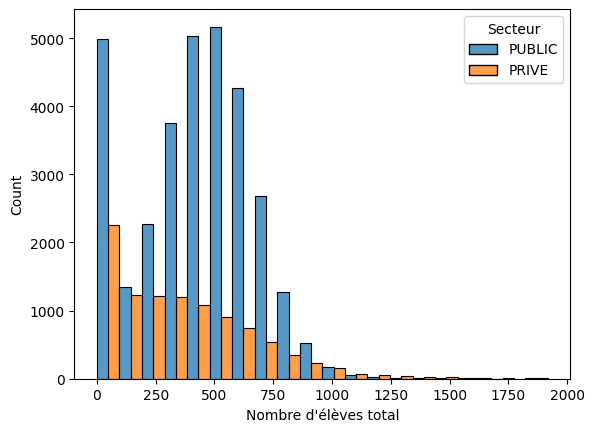

In [4]:
sns.histplot(data=df,x="Nombre d'élèves total", bins=20, multiple="dodge",hue='Secteur')
plt.show()

{'très petit': 616939, 'petit': 4296942, 'moyen': 6449377, 'grand': 1864037, 'très grand': 286366}


C:\Users\marie\AppData\Local\Temp\ipykernel_8152\702433504.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb1=pub.groupby(by='taille')
C:\Users\marie\AppData\Local\Temp\ipykernel_8152\702433504.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb1=pub.groupby(by='taille')


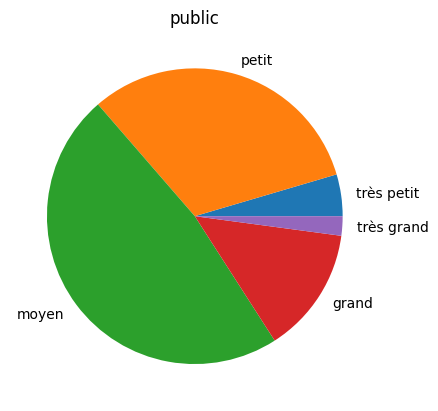

C:\Users\marie\AppData\Local\Temp\ipykernel_8152\702433504.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb1=pub.groupby(by='taille')
C:\Users\marie\AppData\Local\Temp\ipykernel_8152\702433504.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb1=pub.groupby(by='taille')


{'très petit': 445667, 'petit': 1109416, 'moyen': 1119509, 'grand': 650746, 'très grand': 336608}


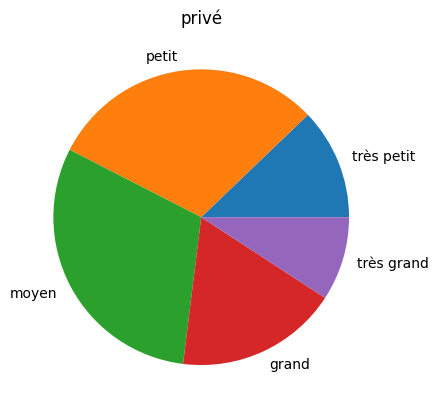

 très petit correspond à un nombre d'élèves compris entre 0 et 250
 petit correspond à un nombre d'élèves compris entre 250 et 500
 moyen correspond à un nombre d'élèves compris entre 500 et 750
 grand correspond à un nombre d'élèves compris entre 750 et 1000
 très grand correspond à un nombre d'élèves supérieur à 1000


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('lv-college.csv', sep = ';')
df['taille']=pd.cut(df["Nombre d'élèves total"], bins=[0,250,500,750,1000,100000], labels=['très petit','petit','moyen','grand','très grand'])

pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()


df.columns
pub=df[df['Secteur']=="PUBLIC"]
gb1=pub.groupby(by='taille')
nombre=[]
taille=[]
dico=gb1["Nombre d'élèves total"].sum().to_dict()
for cle,valeur in dico.items():
    taille.append(cle)
    nombre.append(valeur)
    
print(dico)


plt.pie(nombre,labels=taille)
plt.title('public')
plt.show()


pri=df[df['Secteur']=="PRIVE"]
gb1=pub.groupby(by='taille')
data=gb1["Nombre d'élèves total"].sum().tolist()


df.columns
pub=df[df['Secteur']=="PRIVE"]
gb1=pub.groupby(by='taille')
nombre=[]
taille=[]
dico=gb1["Nombre d'élèves total"].sum().to_dict()
for cle,valeur in dico.items():
    taille.append(cle)
    nombre.append(valeur)
    
print(dico)


plt.pie(nombre,labels=taille)
plt.title('privé')
plt.show()

print(" très petit correspond à un nombre d'élèves compris entre 0 et 250")
print(" petit correspond à un nombre d'élèves compris entre 250 et 500")
print(" moyen correspond à un nombre d'élèves compris entre 500 et 750")
print(" grand correspond à un nombre d'élèves compris entre 750 et 1000")
print(" très grand correspond à un nombre d'élèves supérieur à 1000")

La répartition de la taille des lycées publics et privés n'est pas la même, on retrouve plus de lycées privés dans les extrêmes (petits comme grands). Petits car les lycées ne recrutent pas forcément assez d'élèves. Certains collèges privés sont grands car ils brassent peut-être des élèves sur une large zone géographique et car les parents sont peut-être prêts à ce que leur enfant ait un long temps de transport. De plus, il n'a pas de notion de secteur pour les collèges privés.

# étude du choix de la LV1

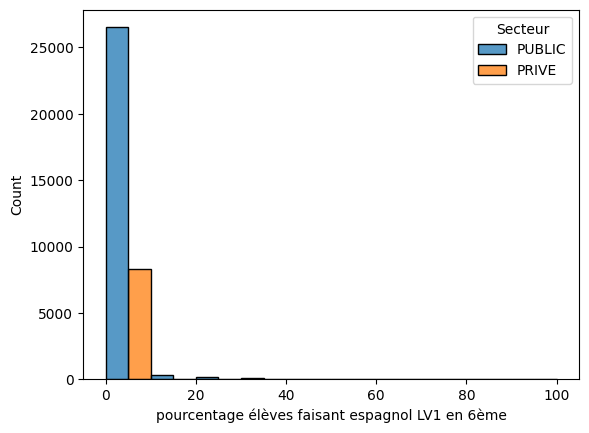

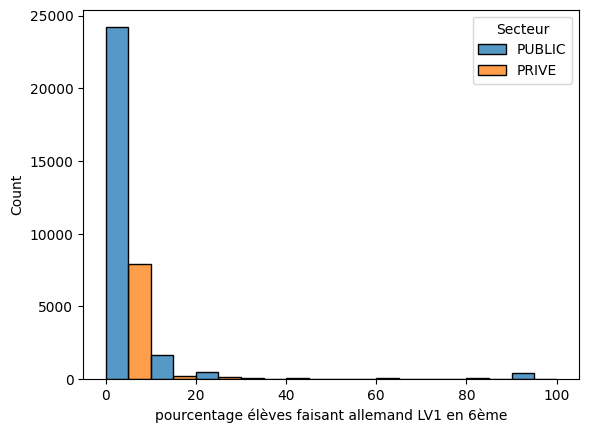

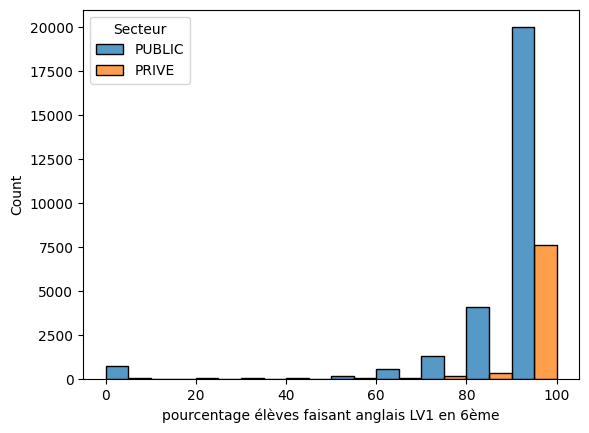

In [6]:
df["pourcentage élèves faisant allemand LV1 en 6ème"]=df["6èmes LV1 allemand"]/df["6èmes total"]*100
df["pourcentage élèves faisant espagnol LV1 en 6ème"]=df["6èmes LV1 espagnol"]/df["6èmes total"]*100
df["pourcentage élèves faisant anglais LV1 en 6ème"]=df["6èmes LV1 anglais"]/df["6èmes total"]*100


sns.histplot(data=df,x="pourcentage élèves faisant espagnol LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant allemand LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge")
plt.show()
sns.histplot(data=df,x="pourcentage élèves faisant anglais LV1 en 6ème",hue="Secteur", bins=10, multiple="dodge",common_norm=True)
plt.show()

Que l'on soit dans le public ou dans le privé, il y a plus d'établissement avec une majorité d'élèves faisant anglais LV1 plutôt qu'une autre langue en LV1 ce qui peut s'expliquer par le fait que l'anglais soit une langue plus simple à apprendre et plus parlée.

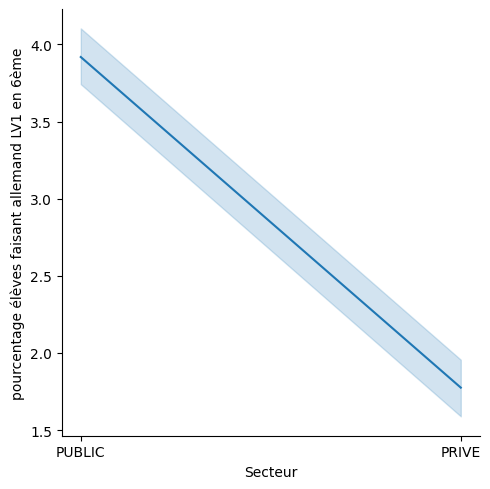

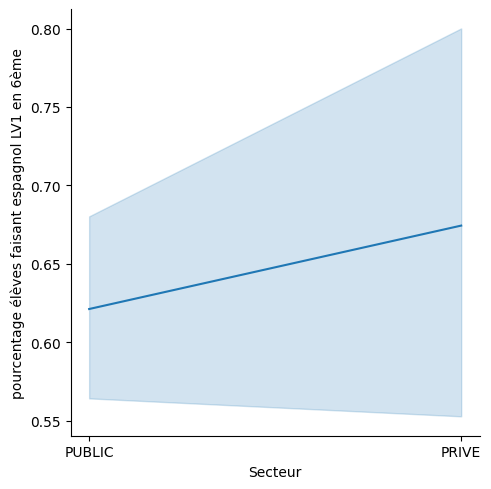

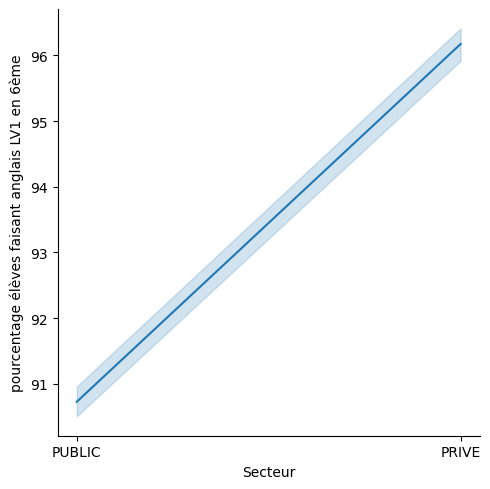

In [7]:
sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Secteur",kind="line")
plt.show()

sns.relplot(data=df,y="pourcentage élèves faisant espagnol LV1 en 6ème", x="Secteur",kind="line")
plt.show()

sns.relplot(data=df,y="pourcentage élèves faisant anglais LV1 en 6ème", x="Secteur",kind="line")
plt.show()


Il y a plus d'élèves qui font allemand LV1 dans le public que dans le privé, cela peut peut-être s'expliquer qu'il s'agit d'une stratégie mise en place pour les parents pour que leur enfant soit dans une bonne classe, l'allemand étant considéré comme étant une langue plus difficile que l'anglais. En ce qui concerne l'espagnol, il y a peu de différence même si l'on peut voir que le pourcentage d'élèves faisant espagnol LV1 varie beaucoup plus dans les collèges privés, il y a peut-être un effet de réputation de la classe espagnol au sein du lycée.

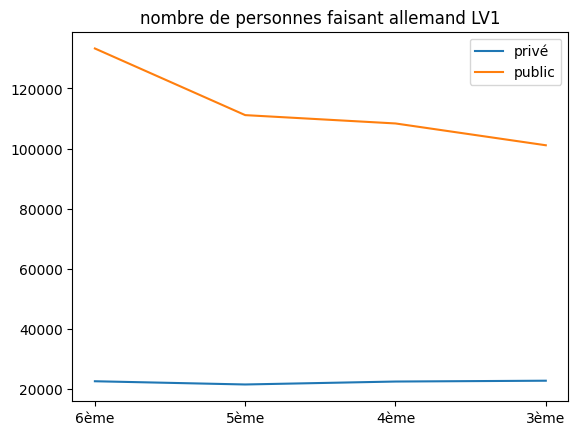

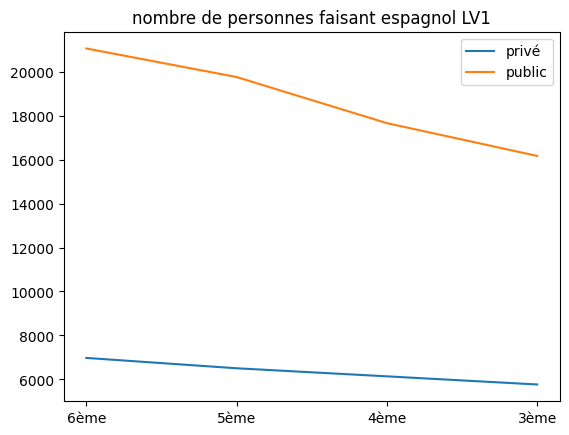

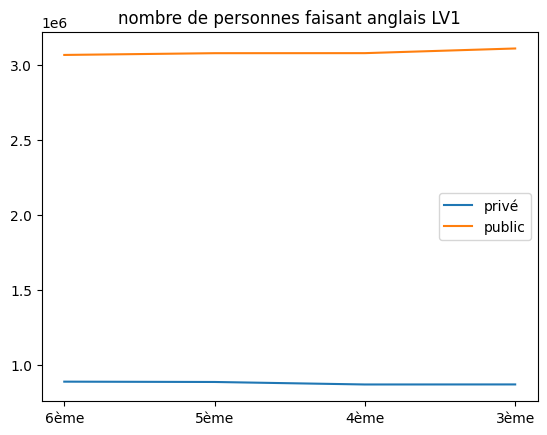

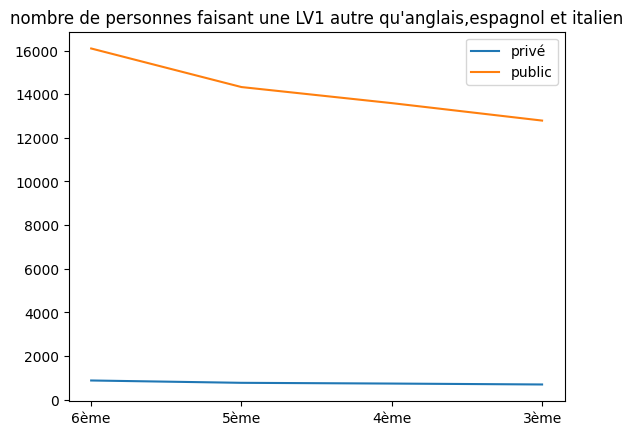

In [10]:
gb=df.groupby(by="Secteur")
gb["6èmes LV1 allemand"].sum()
gb['5èmes LV1 allemand'].sum()
gb["4èmes LV1 allemand"].sum()
gb["3èmes LV1 allemand"].sum()

gb["6èmes LV1 espagnol"].sum()
gb['5èmes LV1 espagnol'].sum()
gb["4èmes LV1 espagnol"].sum()
gb["3èmes LV1 espagnol"].sum()

gb["6èmes LV1 anglais"].sum()
gb['5èmes LV1 anglais'].sum()
gb["4èmes LV1 anglais"].sum()
gb["3èmes LV1 anglais"].sum()

gb["6èmes LV1 autres langues"].sum()
gb["5èmes LV1 autres langues"].sum()
gb["4èmes LV1 autres langues"].sum()
gb["3èmes LV1 autres langues"].sum()

X=["6ème","5ème","4ème","3ème"]
Y=[22539, 21465,22444, 22719]
Z=[133292,111113,108337,101080]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant allemand LV1")
plt.legend()
plt.show()


X=["6ème","5ème","4ème","3ème"]
Y=[ 6980, 6509,6142, 5772]
Z=[21051,19753,17656,16165]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant espagnol LV1")
plt.legend()
plt.show()

X=["6ème","5ème","4ème","3ème"]
Y=[ 885747, 883583,866905,867238]
Z=[3066043,3077735,3078061, 3109186]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant anglais LV1")
plt.legend()
plt.show()

X=["6ème","5ème","4ème","3ème"]
Y=[ 878, 771, 737,695]
Z=[16093, 14325,13589, 12789]
plt.plot(X,Y, label="privé")
plt.plot(X,Z,label="public")
plt.title("nombre de personnes faisant une LV1 autre qu'anglais,espagnol et italien")
plt.legend()
plt.show()


Dans les 2 cas, on observe une diminution du nombre d'élèves faisant une LV1 autre que l'anglais ce qui peut s'expliquer par le fait que des élèves eput-être plus faibles en langue préfèrent se concentrer sur l'anglais. Ce basculement vers l'anglais se traduit bien par une augmentation du nombre d'élèves faisant anglais LV1
Mais n peut voir que les élèves abandonnent beaucoup plus une langue dans le public que dans le privé ce qui peut s'expliquer peut-être par le fait que le privé permet moins à leurs élèves de changer de LV1 et que les aprents vont peut-être dans le même sens.

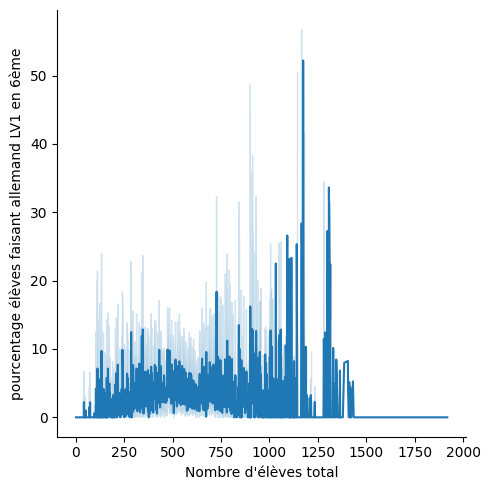

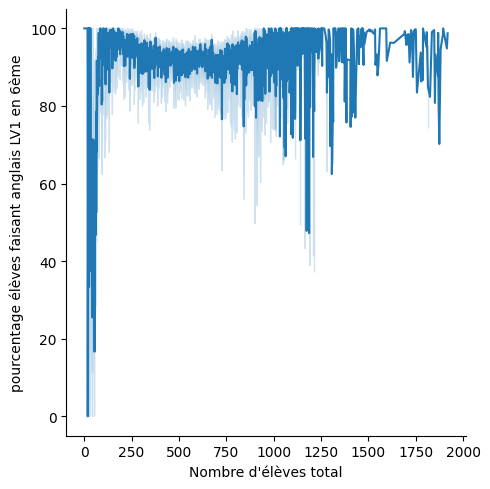

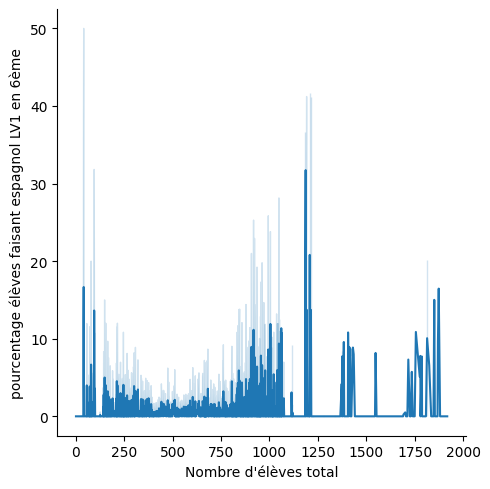

In [14]:
df["pourcentage élèves faisant allemand LV1 en 6ème"]=df["6èmes LV1 allemand"]/df["6èmes total"]*100
df["pourcentage élèves faisant espagnol LV1 en 6ème"]=df["6èmes LV1 espagnol"]/df["6èmes total"]*100
df["pourcentage élèves faisant anglais LV1 en 6ème"]=df["6èmes LV1 anglais"]/df["6èmes total"]*100

sns.relplot(data=df,y="pourcentage élèves faisant allemand LV1 en 6ème", x="Nombre d'élèves total",kind="line")
plt.show()
sns.relplot(data=df,y="pourcentage élèves faisant anglais LV1 en 6ème", x="Nombre d'élèves total",kind="line")
plt.show()
sns.relplot(data=df,y="pourcentage élèves faisant espagnol LV1 en 6ème", x="Nombre d'élèves total",kind="line")
plt.show()

La taille du collège n'est pas un facteur ayant une grande influence sur le pourcentage d'élèves faisant anglais, allemand ou espagnol en tant que LV1